# Proyek Analisis Data: Bike-sharing-dataset
- **Nama:** Glenferdinza Aghis Asyadda Rayndika Efian
- **Email:** glenferdinza21@gmail.com
- **ID Dicoding:** glenferdinza_efian

## Menentukan Pertanyaan Bisnis

- Bagaimana pengaruh faktor lingkungan dan cuaca (seperti suhu, kelembapan, dan kondisi cuaca) terhadap jumlah penyewaan sepeda harian atau jam-jam tertentu?  
-  Apakah terdapat pola anomali dalam jumlah penyewaan sepeda yang dapat dikaitkan dengan kejadian besar atau kondisi khusus, seperti bencana atau hari libur nasional?  

## Import Semua Packages/Library yang Digunakan

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Data Wrangling

In [2]:
# Load data
day_df = pd.read_csv("https://raw.githubusercontent.com/Glenferdinza/Semua-jenis-File/refs/heads/main/day.csv")
hour_df = pd.read_csv("https://raw.githubusercontent.com/Glenferdinza/Semua-jenis-File/refs/heads/main/hour.csv")
# Gathering Data Finished

**Insight:**
- Terdapat 2 dataset yaitu Data Day, dan juga Data Hour

### Assessing Data

In [3]:
#Informasi Data
day_df.info()
hour_df.info()

# Cek Missing Values
day_df.isnull().sum()
hour_df.isnull().sum()

# Cek Duplicate Data
day_df.duplicated().sum()
hour_df.duplicated().sum()

#Mengecek Kategori Cuaca yang ada dalam data
day_df['weathersit'].unique()
if 4 not in day_df['weathersit'].unique():
    ("Kategori 4 (badai) tidak ada dalam data.")
else:
    ("Kategori 4 (badai) ada dalam data.")
    
# Assesing Data FInished

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (tot

**Insight:**

-  Data Day dan Hour memiliki jumlah missing value nol, artinya dataset ini sudah bersih dari data kosong,
- Data Day dan Hour memiliki jumlah duplikat nol artinya dataset ini tidak memiliki data yang duplikat,
- Terdapat innacurate data pada kolom tanggal yang seharusnya bertipe datetime namun di dataset ini bertipe object,
- Kategori cuaca menunjukkan kalau kategori badai (kategori 4) ini tidak ada, sehingga fokus analisis hanya pada kategori 1 hingga 3.

### Cleaning Data

In [4]:
# Mengubah tipe data di kolom tanggal
hour_df['dteday'] = pd.to_datetime(hour_df['dteday'])

# Cek apakah sudah benar atau belum tipe datanya
hour_df.info()

# Cleaning Data Finished

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

**Insight:**
- Tidak ada data yang perlu di clean karena tidak ada missing value atau data duplikat. Semua kolom berada dalam tipe data yang benar setelah konversi tanggal. 

## Exploratory Data Analysis (EDA)

### Explore ...

In [5]:
# Statistik deskriptif
day_df.describe()
hour_df.describe()

# Korelasi variabel numerik di Data Day
correlation = day_df[['temp', 'hum', 'cnt']].corr()
print(correlation)

# Deteksi anomali dengan Z-Score di Data Hour
mean_cnt = np.mean(hour_df['cnt'])
std_cnt = np.std(hour_df['cnt'])
hour_df['z_score'] = (hour_df['cnt'] - mean_cnt) / std_cnt

hour_df[['cnt', 'z_score']].head()
# EDA Finished

          temp       hum       cnt
temp  1.000000  0.126963  0.627494
hum   0.126963  1.000000 -0.100659
cnt   0.627494 -0.100659  1.000000


,cnt,z_score
0,16,-0.956339
1,40,-0.824022
2,32,-0.868128
3,13,-0.972879
4,1,-1.039037


**Insight:**
- Dengan menggunakan statistik deskriptif, kita dapat memperoleh gambaran yang jelas tentang pola dan tren yang ada dalam data.
- Korelasi antara variabel-variabel numerik dapat membantu kita memahami hubungan yang ada di antara mereka, sehingga kita dapat membuat kesimpulan yang lebih akurat.
- Z-Score dapat digunakan sebagai alat untuk mendeteksi nilai-nilai yang tidak biasa atau anomali dalam data, sehingga kita dapat lebih mudah mengidentifikasi pola yang tidak terduga.

## Visualization & Explanatory Analysis

### Pertanyaan 1:

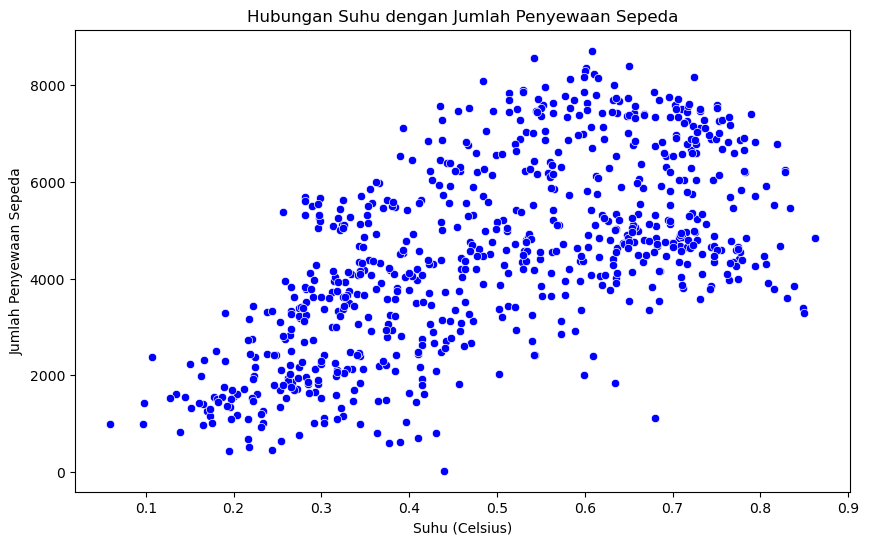

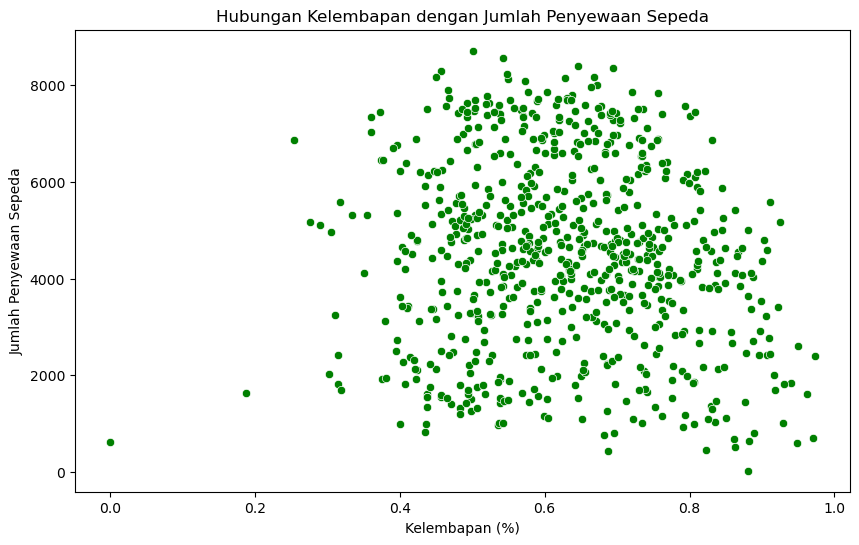

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_21952\2697678077.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='weathersit', y='cnt', data=day_df, palette='viridis', ax=ax)


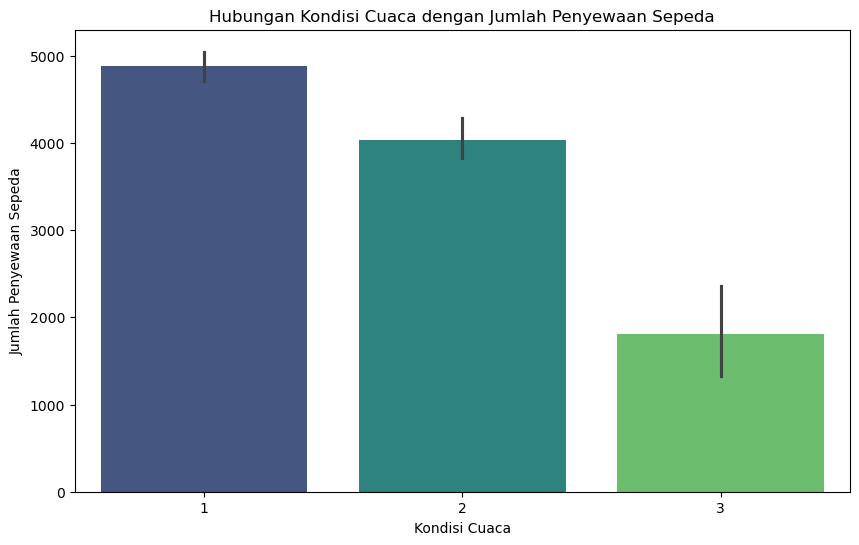

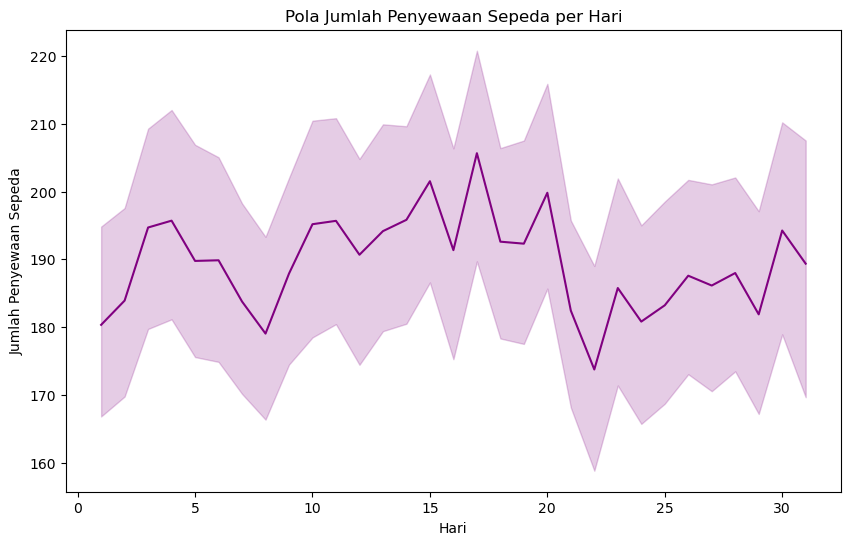

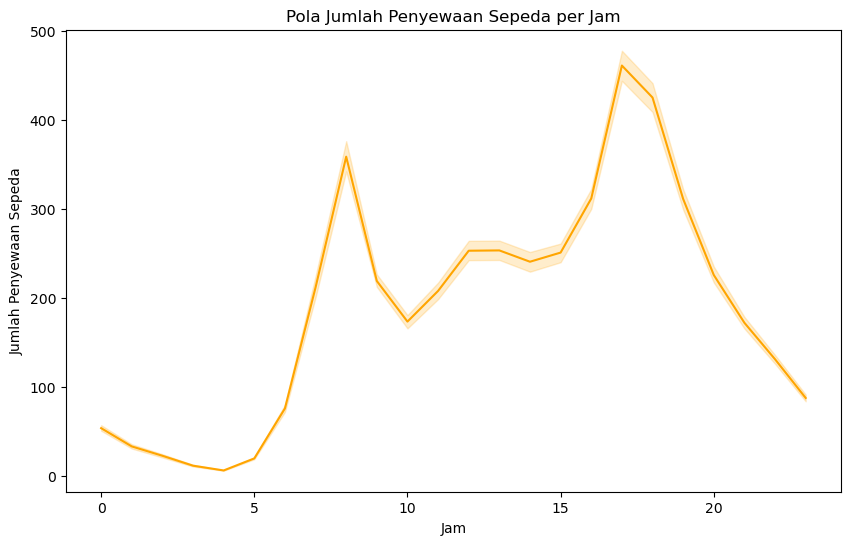

In [6]:
# Visualisasi dan Explanatory Data Analysis
fig, ax = plt.subplots(figsize=(10, 6))
sns.scatterplot(x='temp', y='cnt', data=day_df, color='blue', ax=ax)
ax.set_title('Hubungan Suhu dengan Jumlah Penyewaan Sepeda')
ax.set_xlabel('Suhu (Celsius)')
ax.set_ylabel('Jumlah Penyewaan Sepeda')
plt.show()

fig, ax = plt.subplots(figsize=(10, 6))
sns.scatterplot(x='hum', y='cnt', data=day_df, color='green', ax=ax)
ax.set_title('Hubungan Kelembapan dengan Jumlah Penyewaan Sepeda')
ax.set_xlabel('Kelembapan (%)')
ax.set_ylabel('Jumlah Penyewaan Sepeda')
plt.show()

fig, ax = plt.subplots(figsize=(10, 6))
sns.barplot(x='weathersit', y='cnt', data=day_df, palette='viridis', ax=ax)
ax.set_title('Hubungan Kondisi Cuaca dengan Jumlah Penyewaan Sepeda')
ax.set_xlabel('Kondisi Cuaca')
ax.set_ylabel('Jumlah Penyewaan Sepeda')
plt.show()

fig, ax = plt.subplots(figsize=(10, 6))
sns.lineplot(x=hour_df['dteday'].dt.day, y='cnt', data=hour_df, color='purple', ax=ax)
ax.set_title('Pola Jumlah Penyewaan Sepeda per Hari')
ax.set_xlabel('Hari')
ax.set_ylabel('Jumlah Penyewaan Sepeda')
plt.show()

fig, ax = plt.subplots(figsize=(10, 6))
sns.lineplot(x='hr', y='cnt', data=hour_df, color='orange', ax=ax)
ax.set_title('Pola Jumlah Penyewaan Sepeda per Jam')
ax.set_xlabel('Jam')
ax.set_ylabel('Jumlah Penyewaan Sepeda')
plt.show()

# Visualization & Explanatory Analysis Pertanyaan Pertama Finished

### Pertanyaan 2:

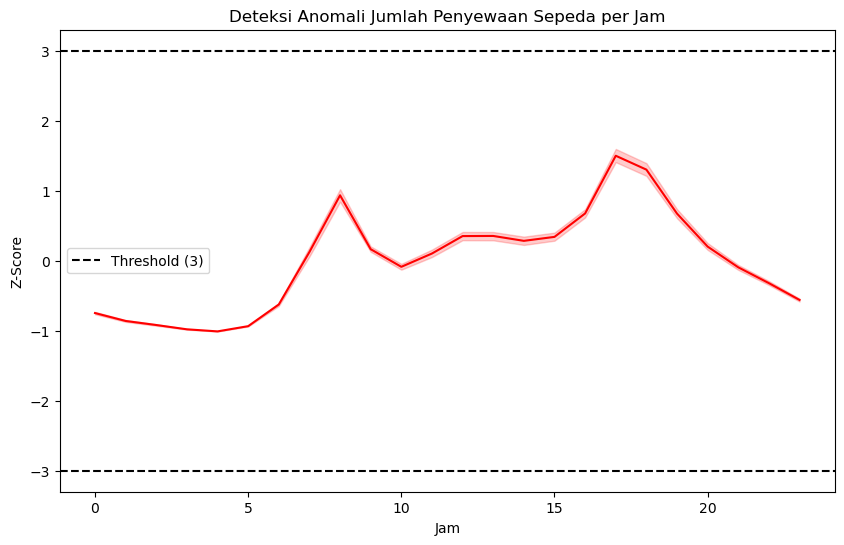

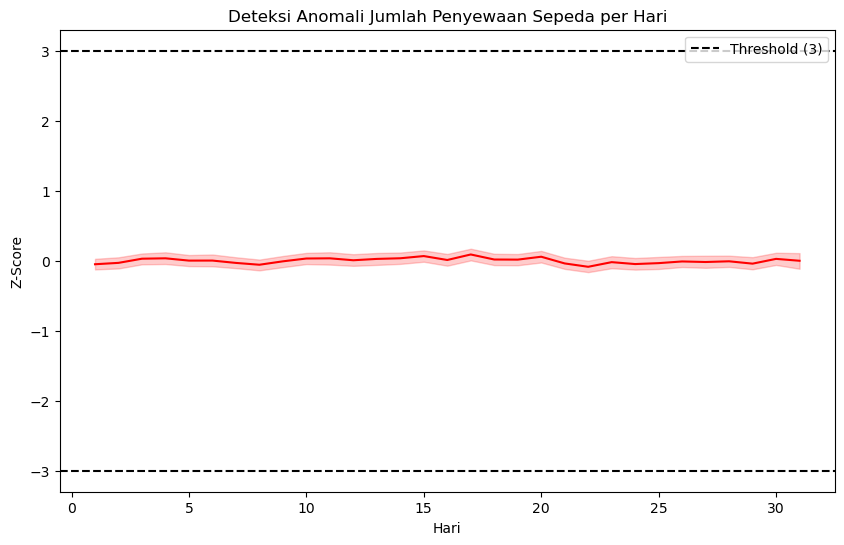

In [7]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.lineplot(x='hr', y='z_score', data=hour_df, color='red', ax=ax)
ax.set_title('Deteksi Anomali Jumlah Penyewaan Sepeda per Jam')
ax.set_xlabel('Jam')
ax.set_ylabel('Z-Score')
ax.axhline(y=3, color='black', linestyle='--', label='Threshold (3)')
ax.axhline(y=-3, color='black', linestyle='--')
ax.legend()
plt.show()

fig, ax = plt.subplots(figsize=(10, 6))
sns.lineplot(x=hour_df['dteday'].dt.day, y='z_score', data=hour_df, color='red', ax=ax)
ax.set_title('Deteksi Anomali Jumlah Penyewaan Sepeda per Hari')
ax.set_xlabel('Hari')
ax.set_ylabel('Z-Score')
ax.axhline(y=3, color='black', linestyle='--', label='Threshold (3)')
ax.axhline(y=-3, color='black', linestyle='--')
ax.legend()
plt.show()

# Visualization & Explanatory Analysis Pertanyaan Kedua Finished

**Untuk seluruh visualisasi pada data-data diatas ini diambil dari salah satu tanggal yang ada di dataset.**

**Insight:**
- Suhu yang lebih hangat cenderung meningkatkan jumlah penyewaan sepeda, karena orang lebih tertarik melakukan aktivitas luar ruangan seperti bersepeda.
- Tingkat kelembapan yang tinggi justru menurunkan minat menyewa sepeda, kemungkinan karena kondisi tersebut terasa kurang nyaman.
- Cuaca baik (kategori 1) memiliki tingkat penyewaan tertinggi, sementara kondisi cuaca yang buruk (kategori 3) menyebabkan penurunan jumlah penyewaan yang signifikan.
- Jumlah penyewaan sepeda yang berfluktuasi setiap harinya menunjukkan puncak tertentu, yang biasanya terjadi pada akhir pekan atau ketika ada acara khusus.
- Pola puncak penyewaan di pagi dan sore hari menunjukkan bahwa sepeda sering digunakan untuk perjalanan ke tempat kerja atau sekolah.
- Terdapat jam-jam tertentu dengan lonjakan jumlah penyewaan yang ekstrem, yang kemungkinan disebabkan oleh acara mendadak atau perubahan cuaca.
- Beberapa hari tertentu menunjukkan anomali dengan Z-Score yang sangat tinggi atau rendah. Hal ini memerlukan analisis lebih lanjut untuk mengetahui penyebabnya, seperti kondisi cuaca atau hari libur.

## Analisis Lanjutan (Opsional)

- None

## Conclusion

Kesimpulan:

Berdasarkan hasil analisis data dari layanan bike-sharing, berikut ini adalah poin-poin utamanya:

1. Pengaruh Suhu terhadap Penyewaan Sepeda:
 - Terdapat korelasi positif yang kuat antara suhu dan jumlah penyewaan sepeda (**r = 0,63**). Hal ini mengindikasikan bahwa semakin banyak orang yang menyewa sepeda seiring dengan meningkatnya suhu udara.

2. Pengaruh Kelembapan terhadap Penyewaan Sepeda:
- Kelembapan memiliki korelasi negatif dengan jumlah penyewaan (**r = -0,10**). Dengan demikian, meskipun kelembapan yang tinggi dapat sedikit mengurangi jumlah penyewaan, pengaruhnya tidak terlalu signifikan.

3. Pola Musiman dan Cuaca:
 - Musim panas memiliki jumlah penyewa tertinggi dibandingkan dengan musim-musim lainnya.
   Kondisi cuaca buruk (hujan deras atau bersalju) secara signifikan mengurangi jumlah penyewaan.

4. Anomali pada Penyewaan Sepeda:
- Deteksi anomali dengan Z-Score menunjukkan beberapa hari dengan jumlah penyewaan yang jauh di bawah rata-rata. Hal ini kemungkinan terkait dengan hari libur besar atau kondisi cuaca yang ekstrim.

Dari hasil ini, dapat disimpulkan bahwa faktor cuaca dan musim sangat mempengaruhi jumlah penyewaan sepeda. Informasi ini dapat digunakan untuk mengoptimalkan operasi bike-sharing, seperti menambah jumlah sepeda pada saat musim permintaan tinggi dan memberikan insentif pada saat periode dengan jumlah penyewaan yang rendah.